<img src="skills_logo-removebg-preview.png" height="70">

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
pd.set_option('display.max_columns',40)

In [ ]:
dataset_path = r'D:\Full-Stack-Data-Science-pro\datasets\heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(dataset_path)
print(df.shape)

In [21]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Q1 what is the distribution of age among heart failure patients in the dataset?

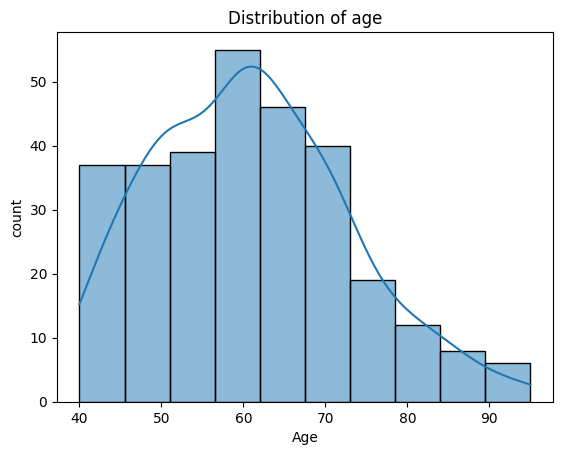

In [27]:
sns.histplot(data=df,x='age',kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

1) the distribution of age column is slightly right skewwed 
2) average age of patiente in dataset is 60
3) majority of patients fall between 50-70 years


Q2 How does the death rate vary with age ?

In [28]:
death_patient = df[df['DEATH_EVENT']==1]

Text(0.5, 1.0, 'Died patient age disribution')

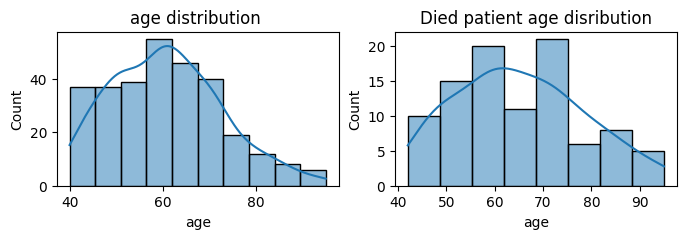

In [41]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
sns.histplot(data=df,x='age',kde=True)
plt.title('age distribution ')
plt.subplot(1,2,2)
sns.histplot(data=death_patient,x='age',kde=True)
plt.title('Died patient age disribution')

1) most patients died in age group of 50-80
2) the maximum people died age group is 55-60 and 70-75 beacuse there death count is 20
3) after 75 age death count deacreases

Q3 What is the percentage of male and female patients in the dataset?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2172\3723643197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='sex',palette=["#FF6F61", "#FAA43A"])


Text(0.5, 1.0, 'count by gender')

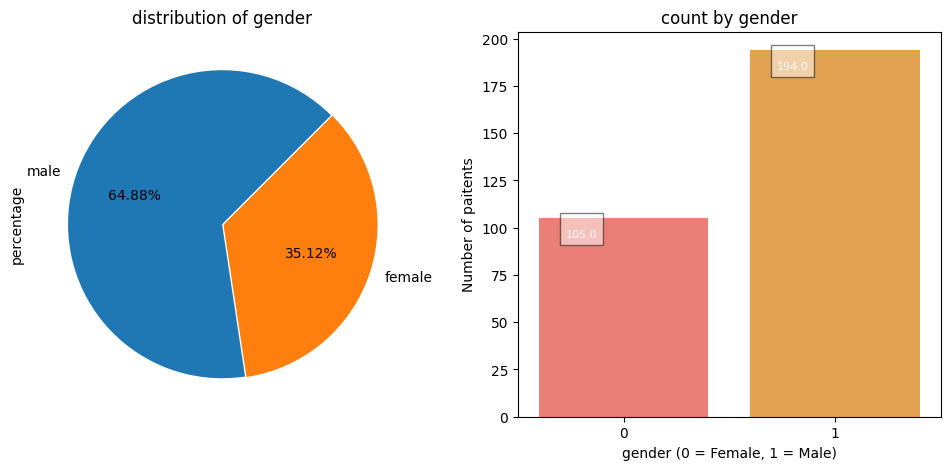

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['sex'].value_counts().plot.pie(startangle=45,autopct='%1.2f%%',explode=(0,0.01),labels=['male','female'])
plt.title('distribution of gender')
plt.ylabel('percentage')
plt.subplot(1,2,2)
ax=sns.countplot(data=df,x='sex',palette=["#FF6F61", "#FAA43A"])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('gender (0 = Female, 1 = Male)')
plt.ylabel('Number of paitents')
plt.title('count by gender')


Q4 How does the platelet count vary among different age groups

In [98]:
filter_data=df.groupby(by='platelets')['age'].sum().reset_index(name='age')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2172\2640878429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="age_group", y="platelets", palette="coolwarm")


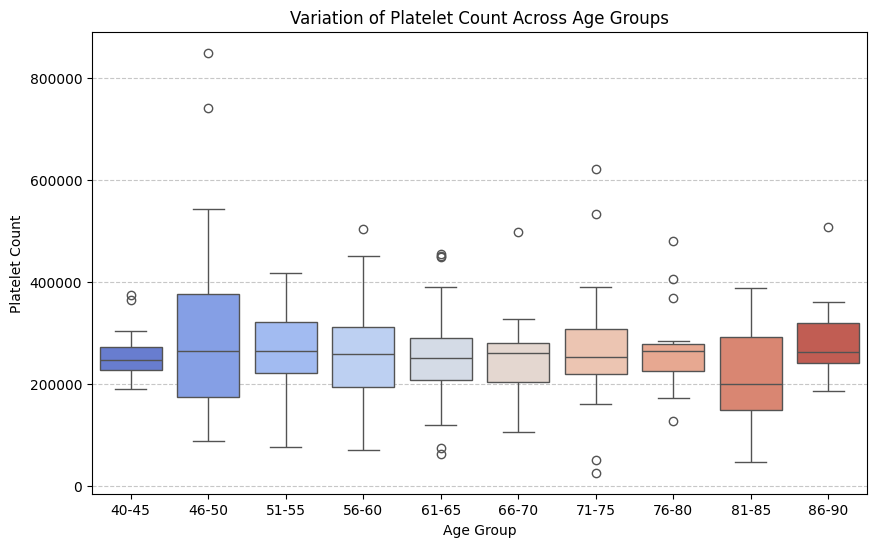

In [145]:
bins = [40, 45, 50,55, 60,65, 70,75, 80,85, 90]  # Age groups
labels = ["40-45","46-50","51-55","56-60", "61-65", "66-70", "71-75","76-80","81-85","86-90"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="age_group", y="platelets", palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Platelet Count")
plt.title("Variation of Platelet Count Across Age Groups")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Platelet count does not decrease linearly with age, but it fluctuates.

The 40-70 age group shows relatively stable platelet counts, mostly centered around 200,000 - 300,000.


 Q4 is there a correlation between creatinine and sodium levels in the blood

In [150]:
df['serum_creatinine'].corr(df['serum_sodium'])

-0.18909521009117392

<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

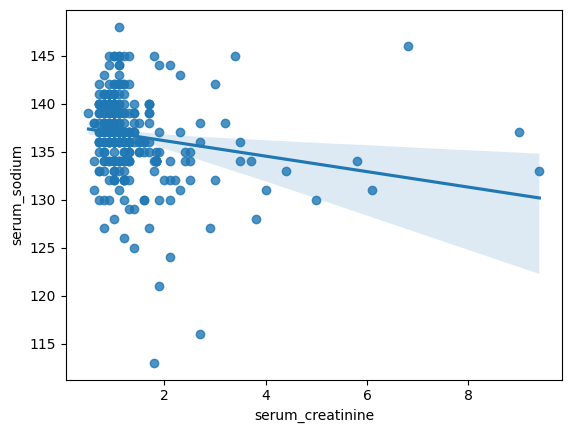

In [152]:
sns.regplot(data=df,x='serum_creatinine',y='serum_sodium')

a correlation of -0.18 between serum_creatinine and serum_sodium indicates a weak negative relationship

Q6 How does the prevalence of high blood pressure differ between male and female patients?


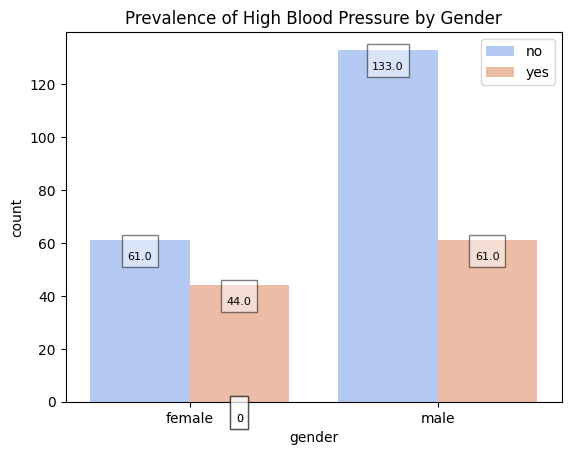

In [184]:
ax = sns.countplot(data=df,x='sex',hue='high_blood_pressure',palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=8, bbox=dict(facecolor='white', alpha=0.5))
plt.legend(labels=['no','yes'])
plt.xticks(ticks=[0,1],labels=['female','male'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('gender')
plt.show()

Q7 What is the relationship between smoking habits and the occurrence of heart failure

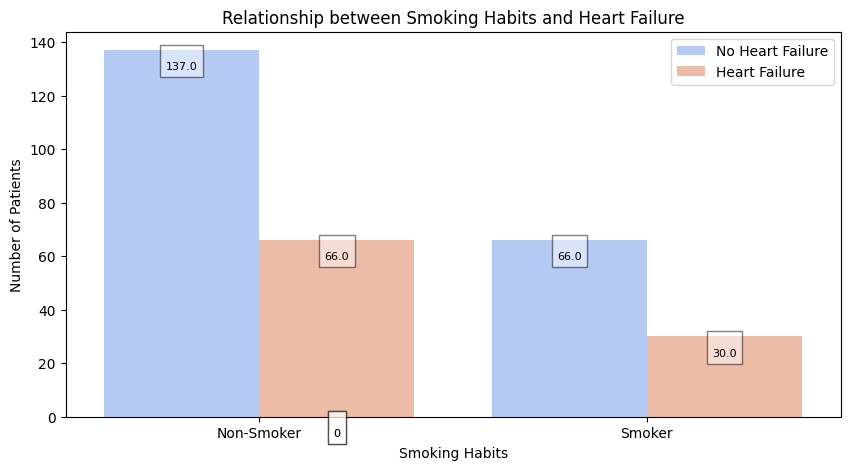

In [187]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='smoking', hue='DEATH_EVENT', palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', color='black', size=8, bbox=dict(facecolor='white', alpha=0.5))
plt.legend(labels=['No Heart Failure', 'Heart Failure'])
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.title('Relationship between Smoking Habits and Heart Failure')
plt.xlabel('Smoking Habits')
plt.ylabel('Number of Patients')
plt.show()